In [2]:
import re, string, json, csv, hashlib, tweepy

global api
consumer_key        = "2KVTe3bF62SX6e9xiUjrAXefy"
consumer_secret     = "sJI0rZPBE7BYHtd2QtzINwzKjrfd38Pl5WRC6ejr9dVUTKEN9r"
access_token        = "106638836-m9aD0K0mmMVHfvNBbg2kn4VD1imhLEcdOfNkRMby"
access_token_secret = "LFNeadXggcxztcCRun8AYMCVfgDu8wdM1wjs3gNHgsoiZ"
auth                = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api                 = tweepy.API(auth, wait_on_rate_limit=False, wait_on_rate_limit_notify=False, compression=True)


In [3]:
import spacy

# spacy.load('id')
nlp = spacy.blank('id')


In [4]:
# words       = "saya selalu benar dan tidak mau tahu dengan keadaan yang di sekitar saya"
# stop_words  =  ["saya", "dan", "dengan", "yang", "di", "pokoknya", "keluar"]
# words_list  = words.split(" ")
# cleaned     = set(words_list) ^ set(stop_words)
# print(" ".join(list(cleaned)))
import requests

emotion = ['marah', 'sedih', 'senang', 'takut', 'khawatir', 'kesal']
sinonim = {}
for emosi in emotion:
    kamus_endpoint = "https://kateglo.com/api.php?format=json&phrase={keyword}".format(keyword=emosi)    
    response = requests.get(kamus_endpoint, verify=True)
    synonim = response.json()['kateglo']['relation']['s']    
    sinonim[emosi] = []
    for index, data in synonim.items():
        try:
#             print(data['related_phrase'])
            sinonim[emosi].append(data['related_phrase'])
        except:
            pass
#         sinonim[emosi].append(data['related_phrase'])
print(sinonim)
        

{'marah': ['berang', 'gusar', 'terbakar', 'bengis', 'menyangkak', 'didih', 'nafsu', 'radang', 'merah telinga', 'muring', 'gemas', 'makan bawang', 'sirap hati', 'merah', 'meruok', 'geram', 'bertelinga merah', 'benci', 'kecil hati', 'sewot', 'palak', 'membawang', 'tersirap hatinya', 'meraba', 'dendam', 'emosi', 'mencak-mencak', 'rampang', 'dengki', 'berangsang'], 'sedih': ['duka', 'isak', 'sedu', 'tersentuh (perasaan)', 'gelebah', 'senak', 'haru', 'larat hati', 'remuk redam', 'gobar hati', 'pedih', 'susah', 'iba', 'terista', 'gundah', 'lemas', 'susah hati', 'masygul', 'benguk', 'berkabut', 'putus tali gantung', 'melankolis', 'dayuh', 'nelangsa', 'enas', 'terdayuh', 'muram', 'derita', 'kuyu', 'galaba', 'lara'], 'senang': ['betah', 'gembira', 'mudah', 'praktis', 'sayang', 'suka', 'tenteram', 'sejuk hati', 'gemar', 'jilah kening', 'girang', 'naim', 'sukacita', 'makmur', 'nikmat', 'aman', 'asyik', 'lapang', 'bahagia', 'demen', 'ceria', 'marem', 'ringan', 'sejuk', 'doyan', 'jidur'], 'takut': 

In [5]:
emotion = ['marah', 'sedih', 'senang', 'takut', 'khawatir', 'kesal']
for padanan, isi in sinonim.items():
    if padanan in ['takut']:
        for kata in isi:
            kamus_endpoint = "https://kateglo.com/api.php?format=json&phrase={keyword}".format(keyword=kata)    
            response = requests.get(kamus_endpoint, verify=False)
            synonim = response.json()['kateglo']['relation']['s']
            if data['related_phrase'] not in sinonim[padanan]:
                sinonim[padanan].append(data['related_phrase'])

/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: In

/home/patrick/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [6]:
print(sinonim)

{'marah': ['berang', 'gusar', 'terbakar', 'bengis', 'menyangkak', 'didih', 'nafsu', 'radang', 'merah telinga', 'muring', 'gemas', 'makan bawang', 'sirap hati', 'merah', 'meruok', 'geram', 'bertelinga merah', 'benci', 'kecil hati', 'sewot', 'palak', 'membawang', 'tersirap hatinya', 'meraba', 'dendam', 'emosi', 'mencak-mencak', 'rampang', 'dengki', 'berangsang'], 'sedih': ['duka', 'isak', 'sedu', 'tersentuh (perasaan)', 'gelebah', 'senak', 'haru', 'larat hati', 'remuk redam', 'gobar hati', 'pedih', 'susah', 'iba', 'terista', 'gundah', 'lemas', 'susah hati', 'masygul', 'benguk', 'berkabut', 'putus tali gantung', 'melankolis', 'dayuh', 'nelangsa', 'enas', 'terdayuh', 'muram', 'derita', 'kuyu', 'galaba', 'lara'], 'senang': ['betah', 'gembira', 'mudah', 'praktis', 'sayang', 'suka', 'tenteram', 'sejuk hati', 'gemar', 'jilah kening', 'girang', 'naim', 'sukacita', 'makmur', 'nikmat', 'aman', 'asyik', 'lapang', 'bahagia', 'demen', 'ceria', 'marem', 'ringan', 'sejuk', 'doyan', 'jidur'], 'takut': 

In [7]:
import pandas as pd

alay_df         = pd.read_csv('kamus_alay.csv', index_col=None, header=0)
kamus_alay_list = list(alay_df['slang'])
kamus_alay      = dict(zip(alay_df['slang'], alay_df['formal']))
for alay, formal in kamus_alay.items():
    print(alay, formal)

woww wow
aminn amin
met selamat
netaas menetas
keberpa keberapa
eeeehhhh eh
kata2nyaaa kata-katanya
hallo halo
kaka kakak
ka kak
daah dah
aaaaahhhh ah
yaa ya
smga semoga
slalu selalu
amiin amin
kk kakak
trus terus
sii sih
nyenengin menyenangkan
bgt banget
gemess gemas
akuuu aku
jgn jangan
udah sudah
gitu begitu
aja saja
gemesiin menggemaskan
menyenangkn menyenangkan
rb ribu
akau aku
saranin menyarankan
nemuin menemukan
yah ya
mnis2nya manis-manisnya
gtu begitu
tu itu
idolaa idola
bangett banget
kaakk kak
baaiikkk baik
telaatt telat
kaak kak
yg yang
lg lagi
skarang sekarang
sempet sempat
karna karena
ngga enggak
mantep mantap
loohhh loh
yeee ya
baguuuuus bagus
sampe sampai
ngikutin mengikuti
gayany gayanya
bnk bang
awaas awas
siip sip
abizzzz habis
kerrrrennnn keren
sayaa saya
pengen pengin
kpan kapan
sma sama
sdkit sedikit
bngt banget
lgu lagu
bener2 benar-benar
kharismanya karismanya
aq aku
jdi jadi
lgi lagi
gk enggak
kek kayak
lgunya lagunya
kereeeeennnn keren
nyamain menyamakan
laki

lhat lihat
cantika cantik
cwek cewek
kngen kangen
fillm film
sinet sinetron
jendral jenderal
nanya bertanya
maenya mainnya
cantiks cantik
wktu waktu
pilm film
taon tahun
nd indak
slah salah
cini sini
jaaangan jangan
nambah menambah
naek naik
terimaksih terima kasih
inii ini
kaannnn kan
tidakkkk tidak
kemuh kamu
da dah
keren2 keren-keren
sby surabaya
tgl tanggal
pinginnn pengin
buanget banget
ketemuuu ketemu
kebawa terbawa
mimpiii mimpi
wanjerrr anjir
satupunn satupun
motret memotret
temen2 teman-teman
lapakk lapak
nyeniii menyeni
bget banget
seeh sih
abis habis
deuhh duh
b2an berduaan
dihargain dihargai
engga" enggak-enggak
tahun2 tahun-tahun
lebayy lebay
gilsss gila
nganbek mengambek
sukaa suka
enk enak
mendam memendam
manta mantan
relaaaa rela
bgun bangun
tdur tidur
cntk cantik
knl kenal
anugrah anugerah
slm salam
kliatan kelihatan
awoohhh allah
cantiikk cantik
gt begitu
sbbyak sebanyak
apun apapun
nyangkutnya menyangkutnya
untk untuk
ampunnnnn ampun
hy hai
wadaaw waduh
paraah parah


kucing'y kucingnya
nama'in namai
panggilan'ya panggilannya
panggilan'y panggilannya
z saja
kalw kalau
tips2 tips-tips
alu aku
ngerrrriiii ngeri
ngriii mengiri
amatt amat
smpai sampai
kox kok
tmbah tambah
cntikk cantik
pkee pakai
smkin semakin
amiiiiinnn amin
bgmna bagaimana
ssorg seseorang
hdpn hadapan
foto2 foto-foto
mnambh menambah
ktaatan ketaatan
stju setuju
cantikkkkkk cantik
dilepas2 dilepas-lepas
tehhh teh
istiqomahhh istikamah
tehhhh teh
prodaknya produknya
imutt imut
amu kamu
nahh nah
mauuuuuuu mau
jilbb jilbab
tmn teman
ndut gendut
ngecek mengecek
psti pasti
penasarn penasaran
cuyy cuy
astauviruloh astagfirullah
paaak pak
diajarin diajari
gawl gaul
kecr kece
iih ih
laaaah lah
aned banget
gingsungny gingsulnya
blh boleh
cariin carikan
kenceng kencang
cuanti cantik
mbanya mbaknya
knlan kenalan
mbaakk mbak
mrka mereka
nyusahhin menyusahkan
byaran bayaran
wlawpun walaupun
sedangkn sedangkan
tnpa tanpa
bnggain banggakan
nyusahin menyusahkan
malu2in malu-malui
dibanggain dibanggaka

sstu sesuatu
serasiii serasi
cocokx cocoknya
emakx emaknya
iniiiiiiiiiiiiiii ini
cocookk cocok
kll kalo
arghhh ah
ungkapin ungkapkan
merrid merit
neh nih
cocokkkkk cocok
yaolohh ya allah
aee saja
naggung menanggung
battt banget
am sama
tah teh
luthuna lucunya
astagaaa astaga
suaraynyaa suaranya
duanyaa duanya
anjayyyy anjay
coeggg coeg
ancur hancur
koplak kocak
uaaasssiiiik asik
boss bos
nyubit mencubit
dede adek
gemez gemas
tium cium
gemeeezzzz gemas
ppa papa
papahhhnya papahnya
duuuhh duh
ginting ganteng
bingiiittzz banget
iiihh ih
dedeknya adeknya
hadeeuh aduh
geneeee begini
yooow ya
gemezz gemas
gayax gayanya
infpyunnnn ampun
paraaah parah
papiii papi
kamunyaa kamunya
ngambek mengambek
haduuuh aduh
kapaan kapan
nginjek menginjak
putihnyaa putihnya
ituuuu itu
omaaaaaaakk oma
loncattt loncat
didatengin didatangi
abg abang
kmariiin kemarin
ayoklaa ayolah
jelasssss jelas
kaliiin kalian
ujunggg ujung
kaakaaaa kakak
srruu seru
kannn kan
jmpaaaa jumpa
yukkk yuk
haii hai
syukaaakkk suka
de

In [8]:
from spacy.lang.id.stop_words import STOP_WORDS

alay_df.shape
# nlp = spacy.blank('id')

(15006, 7)

In [9]:
import os.path

search_term = ["new normal"]
file_name   = []
for keyword in search_term:    
    version = 0
    filename = keyword + "_" + str(version) + ".csv"      
    exist = True
    while (exist):                    
        filename = keyword + "_" + str(version) + ".csv"
        if os.path.isfile(filename) is not True:
            f = open(filename, "w+")  
            exist = False
            file_name.append(filename)
            break
        else:
            print(version, "file still exist")
            version += 1

    

0 file still exist
1 file still exist
2 file still exist
3 file still exist
4 file still exist
5 file still exist
6 file still exist
7 file still exist
8 file still exist
9 file still exist
10 file still exist
11 file still exist
12 file still exist
13 file still exist
14 file still exist
15 file still exist
16 file still exist
17 file still exist
18 file still exist


In [10]:
print(file_name)

['new normal_19.csv']


In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


listStopword       = set(stopwords.words('indonesian'))
custom_stop_words  = ['gak', 'ga','kl', 'tdk', 'yg', 'hrs', 'utk', 'dg', 'dgn', 'tp', 'nya', 'dgn', 'udah', 'dah',
                     'sih', 'nih', 'kan', 'enggak', 'lha', 'nah', 'tuh', 'nya', 'yg', 'yuk', 'gw', 'gue', 'gua', 'guwa',
                     'pantes', 'kuy', 'sip', 'bro', 'sis', 'plis', 'ya', 'kalo', 'klw', 'klo', 'aja', 'say', 'sy',
                     'cyin', 'cin', 'skrg', 'drpd', 'timbang', 'ngga', 'oh', 'lho', 'kok', 'kek', 'kayak', 'lg', 'nak',
                     'ni', 'dkt', 'deket', 'nggak', 'kagak', 'ttp', 'teteup', 'moga', 'tu', 'bgt', 'banget', 'gengs', 
                     'gaes', 'guys', 'cuy', 'dpt', 'gaada', 'awan', 'duh', 'dr', 'karna', 'lu', 'elu', 'mah', 'ajah']

geo = '-6.2115,106.8452,2500km'

   = listStopword|set(custom_stop_words)
# fetched_tweets = api.search("Lockdown Indonesia -filter:retweets&verified", count = 1500, lang="id")


def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

def clean_alay(string_alay):
    cleaned = []    
    words   = string_alay.lower().strip().split(' ')
#     words = nlp(string_alay)
    for word in words:
        if word in kamus_alay_list:
            word = kamus_alay[word]
        cleaned.append(word)
    return ' '.join(cleaned)
    
def remove_noise(tweet_masuk):
    # and all(ord(c) < 128 for c in word) \
    words           = tweet_masuk.lower().strip().split(' ')
#     words = nlp(tweet_masuk)
    return_words    = []    
    for word in words:
        word = word.rstrip().lstrip()
        if word == 'rt':
            index = words.index(word)+1
            words.remove(words[index])
            
        if not re.match(r'^https?:\/\/.*[\r\n]*', word) \
        and not re.match('^@.*', word) \
        and not re.match('\s', word) \
        and '@' not in word \
        and 'https' not in word \
        and 'http' not in word \
        and word not in search_keyword \
        and word != 'rt' \
        and word != '':
            return_words.append(word)        
    return ' '.join(return_words)

def remove_stopword(tweet_masuk):
    removed = []
    doc     = nlp(tweet_masuk)
    for token in doc:
        lemmatized = [doc for doc in nlp(token.lemma_)]
#         print(lemmatized[0].text)
        if lemmatized[0].is_stop == False \
            and lemmatized[0].text not in search_keyword \
            and lemmatized[0].text not in custom_stop_words:
            finalized = "".join(str(lemmatized[0]))
            removed.append(finalized)
    return " ".join(removed)

i = 0;
final_data  = []
added_tweet = []
selected_file = 0
for keyword in search_term:
    keyword = keyword + " exclude:retweets "
#     + " since:2020-03-02 until:2020-03-03 lang:id"
    print(keyword)    
#     fetched_tweets = api.search(keyword, count = 100, lang="id")
    fetched_tweets = tweepy.Cursor(api.search, 
                                   q=keyword, 
#                                    geocode=geo, 
                                   lang="id",   
                                    since='2021-01-10',
                                    until='2021-01-14',                                   
                                   tweet_mode='extended'
                                     ).items(250)
    search_keyword = ["new", "normal", "newnormal"]
    i = 0;
    final_data  = []
    added_tweet = []
    for tweet in fetched_tweets:
#         print(tweet.full_text)
        parsed_tweet      = {}
        text_asli         = tweet.full_text.lower()
        if tweet.coordinates is not None:
            print(tweet.coordinates)
        hashed_tweet      = hashlib.md5(text_asli.encode('utf-8')).hexdigest()

        if hashed_tweet not in added_tweet:        
            added_tweet.append(hashed_tweet)
            removed_noise     = remove_noise(text_asli)   
            removed_alay      = clean_alay(removed_noise)
            removed_stopwords = remove_stopword(removed_alay)
            final_data.append([text_asli, removed_noise, removed_alay, removed_stopwords])
    
    file = str(file_name[selected_file])
    print(file)
    with open(file, mode='w', newline='') as tweet_data:
        fieldnames = ['text_asli', 'removed_noise', 'removed_alay', 'removed_stopwords']
        writer = csv.DictWriter(tweet_data, fieldnames=fieldnames)
        writer.writeheader()
        for item in final_data:
            writer.writerow({'text_asli':item[0], 'removed_noise':item[1],'removed_alay':item[2], 'removed_stopwords': item[3]})
#     selected_file = selected_file +1

new normal exclude:retweets 
{'type': 'Point', 'coordinates': [108.7245819, -6.8229027]}
new normal_19.csv


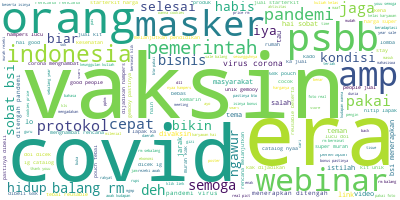

In [12]:
file = file_name[0]
df = pd.read_csv(file, index_col=None, header=0)
df['removed_stopwords'].fillna(df['removed_noise'], inplace=True)
# df['sentiment'] = map(reduce df['removed_stopwords'])
# df.head()
from wordcloud import WordCloud

df.drop(df.index[8])
# Join the different processed titles together.
long_string = ','.join(list(df['removed_stopwords'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



/home/patrick/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[('warming', 35.0),
 ('awam', 31.0),
 ('moco', 25.0),
 ('tjiptaning', 21.0),
 ('kebangkitan', 20.0),
 ('yaudalahayaa', 19.0),
 ('mengomongkan', 18.0),
 ('presidium', 16.0),
 ('solo', 15.0),
 ('gunanya', 14.0)]

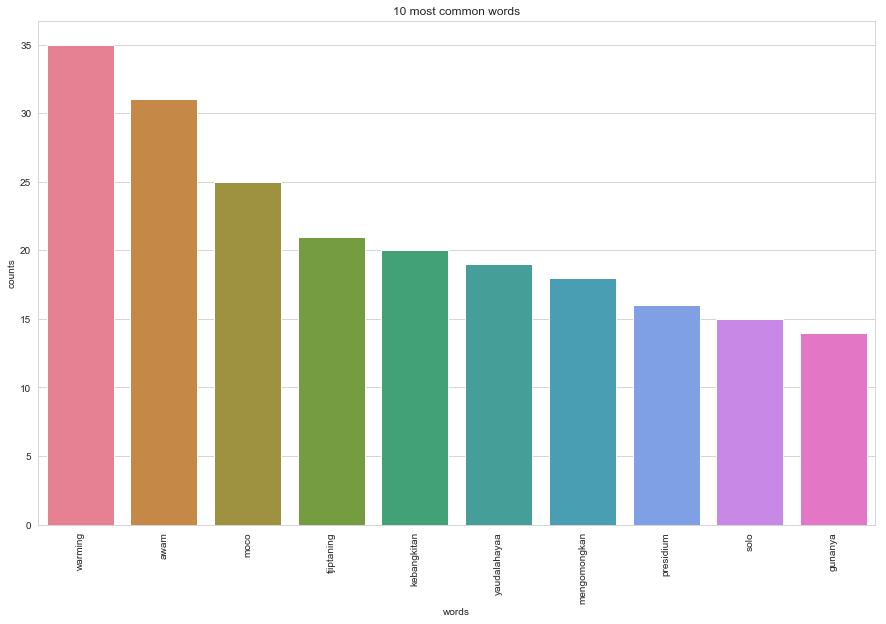

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words        = count_vectorizer.get_feature_names()
    words        = list(set(words) - set(search_term))
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    display(count_dict)
    words      = [w[0] for w in count_dict]
    counts     = [w[1] for w in count_dict]
    x_pos      = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=listStopwordFinal)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['removed_stopwords'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

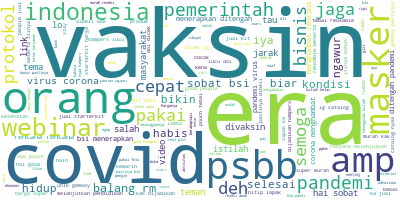

In [14]:
file = file_name[0]
df = pd.read_csv(file, index_col=None, header=0)
df['removed_stopwords'].fillna(df['removed_noise'], inplace=True)
# df['sentiment'] = map(reduce df['removed_stopwords'])
# df.head()

from wordcloud import WordCloud

df.drop(df.index[8])
# Join the different processed titles together.
long_string = ','.join(list(df['removed_stopwords'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [15]:
df.head()

,text_asli,removed_noise,removed_alay,removed_stopwords
0,jadi vaksin ga divaksin harus tetap new normal...,jadi vaksin ga divaksin harus tetap ya?,jadi vaksin enggak divaksin harus tetap ya?,vaksin divaksin ?
1,ingatlah kawan....\nsegala sesuatu di dunia in...,ingatlah kawan....\nsegala sesuatu di dunia in...,ingatlah kawan....\nsegala sesuatu di dunia in...,ingatlah kawan .... \n dunia \n serba \n kesul...
2,"dari mulai drama sicovid masuk indo, masker, p...","dari mulai drama sicovid masuk indo, masker, p...","dari mulai drama sicovid masuk indo, masker, p...","drama sicovid masuk indo , masker , psbb , , v..."
3,@kang_batag0r @sherinasinna gausah bilang new ...,gausah bilang normal. orang indo kapan pernah,enggak usah bilang normal. orang indonesia kap...,bilang . orang indonesia
4,kangen masa masa sebelum new normal 😔😔😔😔 https...,kangen masa masa sebelum 😔😔😔😔,kangen masa masa sebelum 😔😔😔😔,kangen 😔 😔 😔 😔


/home/patrick/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[('era', 35.0),
 ('vaksin', 31.0),
 ('covid', 25.0),
 ('pandemi', 21.0),
 ('harga', 20.0)]

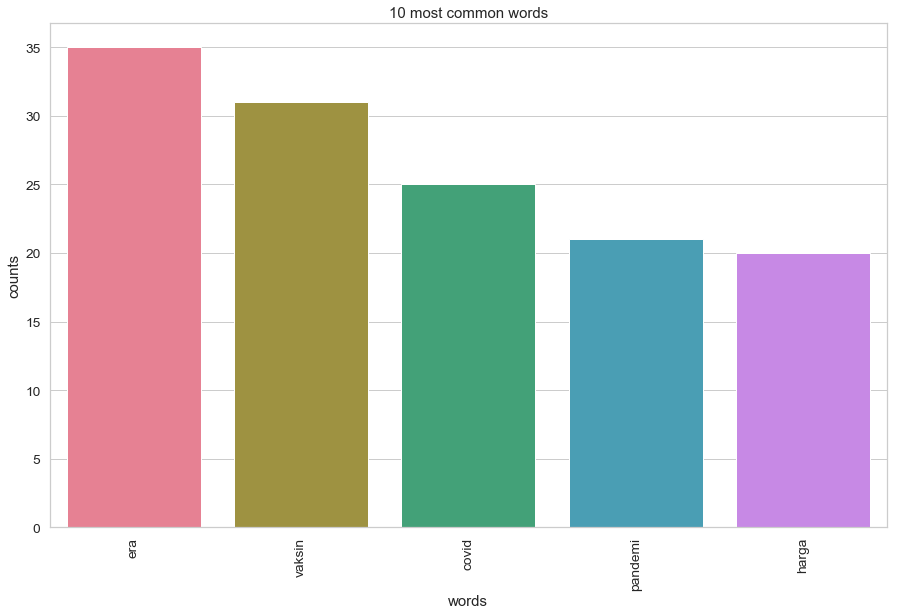

In [81]:
# Import the wordcloud library
# print(df['removed_stopwords'].values)
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words        = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    display(count_dict)
    words      = [w[0] for w in count_dict]
    counts     = [w[1] for w in count_dict]
    x_pos      = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=listStopwordFinal)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['removed_stopwords'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

[('rumah', 67.0),
 ('wfh', 54.0),
 ('kerja', 27.0),
 ('virus', 22.0),
 ('19', 20.0),
 ('corona', 20.0),
 ('covid', 20.0),
 ('2020', 19.0),
 ('produktif', 19.0),
 ('tips', 19.0)]

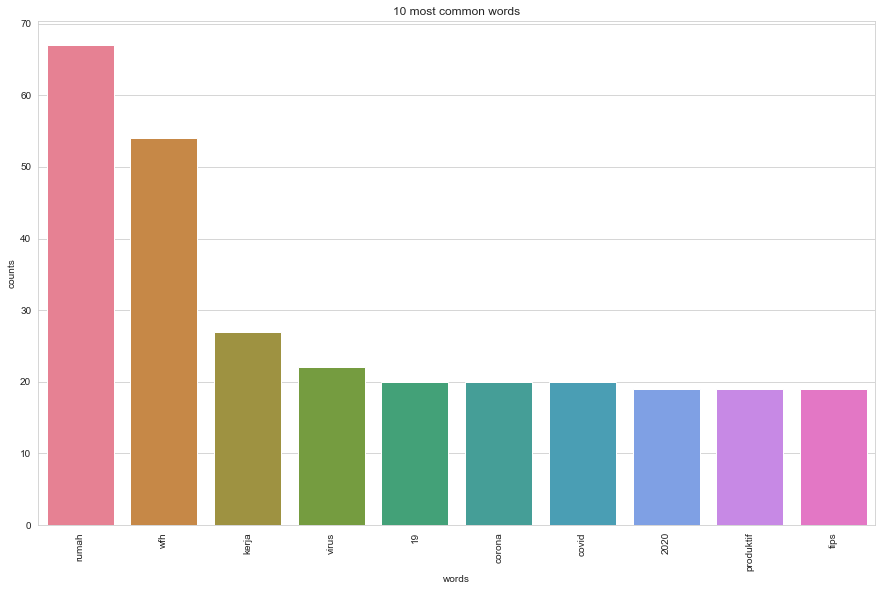

In [80]:
import warnings
from pprint import pprint
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, learning_decay=0.7)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_topics)

print("Log Likelihood: ", lda.score(count_data))
print("Perplexity: ", lda.perplexity(count_data))

# See model parameters
pprint(lda.get_params())


Topics found via LDA:

Topic #0:
previous 15 ayo ruwet gini boyz konteks udh ra menulary

Topic #1:
nyari njobo isian travel gcash ngasih duka bk perhatiin peluang

Topic #2:
pon gimana sejarah bioskop mata tissue cepat order mahmud dikit2

Topic #3:
gitu menulary gmna isian jaga mreka dapet iypg4all ki dipilih

Topic #4:
tida duka cepet2 hopeeee ternama showcase diwajibin kudapan org alexa

Topic #5:
hopeeee tida liem periode promo pingin pikiran duka in sutisna

Topic #6:
cepet2 normality tida bersyukurlah 184 people bernaung buku keje terhad

Topic #7:
duka susanto lock in class anakku mco terbuka setahun kelas

Topic #8:
cepet2 ruwet covid 184 get down korban rapik 750d sayang

Topic #9:
gmna duka modal pikiran dipakai coming iki semoga bahas cileunyi
Log Likelihood:  -24835.458925378698
Perplexity:  1855.4761821263853
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_

In [78]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model


# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(count_data)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.5,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [79]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(count_data))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -11539.261899430907
Model Perplexity:  1859.3985198317696


In [63]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=stopwords, texts=df['removed_stopwords'], start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

NameError: name 'mallet_path' is not defined

In [54]:
from gensim.test.utils import common_corpus, common_dictionary

from gensim.models.coherencemodel import CoherenceModel

topics = [

    ['human', 'computer', 'system', 'interface'],

    ['graph', 'minors', 'trees', 'eps']

]

cm = CoherenceModel(topics=topics, corpus=common_corpus, dictionary=common_dictionary, coherence='u_mass')

coherence = cm.get_coherence() 
print(coherence)

-7.105015580153772


In [18]:
from sklearn.cluster import KMeans

X = count_vectorizer.fit_transform(df['removed_noise']).toarray()
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=2, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.get_feature_names()

In [20]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 normal
 era
 vaksin
 covid
 pandemi
 new
 harga
 pake
 19
 orang
Cluster 1:
 materi
 strategi
 ubsi
 era
 kom
 normal
 layanan
 karir
 kreatif
 content
Cluster 2:
 vaksin
 abis
 jg
 kena
 kebersihan
 disiplin
 gejala
 jenis
 mencegah
 ringan


In [25]:
for i in range(5,101,5):
    n_topics = i

    print("Fitting LDA models with tf features, "
          "n_samples=%d, n_features=%d n_topics=%d "
          % (n_samples, n_features, n_topics))

    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)
    t0 = time()
    lda.fit(tf)

    train_gamma = lda.transform(tf)
    train_perplexity = lda.perplexity(tf, train_gamma)

    test_gamma = lda.transform(tf_test)
    test_perplexity = lda.perplexity(tf_test, test_gamma)

    print('sklearn preplexity: train=%.3f, test=%.3f' %
          (train_perplexity, test_perplexity))

    print("done in %0.3fs." % (time() - t0))


NameError: name 'n_samples' is not defined

In [21]:
from sklearn.feature_selection import chi2
import numpy as np

'''Labelkan dulu dataset dengan emosi maupun positif negatif, baru lakukan ini'''
N = 3
for keyword, persamaan in sorted(sinonim.items()):
    features_chi2 = chi2(features, persamaan)
    indices       = np.argsort(features_chi2[0])
    features_name = np.array(tfidf.get_feature_names())[indices]
    unigram        = [v for v in features_name if len(v.split(' ')) == 1]    
    print("# '{}'".format(category))
    print(" . Most Corelated unigrams : \n     . {}".format('\n  . '.join(unigram[-N])))

NameError: name 'features' is not defined

In [3]:
Y = tf.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

NameError: name 'tfidf' is not defined